In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os

os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-4o",
    temperature=0
)

In [4]:
# from langchain_groq import ChatGroq
# llm = ChatGroq(
#     model_name="qwen/qwen3-32b",
#     temperature=0
# )

In [5]:
response = llm.invoke("Hello, how are you?")

In [6]:
from langchain.tools import tool

In [7]:
@tool
def multiply(a: float, b: float) -> float:
    """
    Multiply two integers.

    Args:
        a (float): The first integer.
        b (float): The second integer.

    Returns:
        float: The product of a and b.
    """
    return a * b

@tool
def add(a: float, b: float) -> float:
    """
    Add two integers.

    Args:
        a (float): The first integer.
        b (float): The second integer.

    Returns:
        float: The sum of a and b.
    """
    return a + b

@tool
def divide(a: float, b: float) -> float:
    """
    Divide two integers.

    Args:
        a (float): The numerator.
        b (float): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

@tool
def subtract(x: float, y: float) -> float:
    """
    Subtracts two numbers. 
    
    Args:
        x (float): The first number.
        y (float): The second number.
    
    Returns:
        float: The difference of the two numbers.
    """
    return x - y

In [8]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [9]:
search.invoke("What is the latest update on iPhone 17?")

'iPhone 17: New slimmer \'iPhone 17 Air\' model. ... Various rumors suggest that the new iPhones could benefit from the following updates: Design and display. 2025 could bring one of the biggest updates to the iPhone\'s design that we\'ve seen since the 2017 iPhone X, with Apple rumored to be planning for an all-new iPhone 17 "Air" that has a much thinner ... Apple\'s iOS 17.7 upgrade was released alongside iOS 18, including many of the same security fixes.The iOS 17.7 update is for iPhone users who want to wait before upgrading to the latest Apple ... CUPERTINO, CALIFORNIA Apple today previewed iOS 26, a major update that brings a beautiful new design, intelligent experiences, and improvements to the apps users rely on every day.The new design provides a more expressive and delightful experience across the system while maintaining the instant familiarity of iOS. Apple has released the latest versions of its iPhone and iPad software: iOS 17.6 and iPadOS 17.6 are now available for downl

In [10]:
tools=[search, multiply, add, divide, subtract]

In [11]:
llm_with_tools = llm.bind_tools(tools)

In [12]:
x = llm_with_tools.invoke("What is the latest update on iPhone 17?")

In [13]:
x.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'iPhone 17 latest update'},
  'id': 'call_EowAefLGwwcN0Wb74ZEkyX0P',
  'type': 'tool_call'}]

In [14]:
x = llm_with_tools.invoke("Add 4 and 5")

In [15]:
x

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5VGWnUbo8uYaNBCV6WwJBVWn', 'function': {'arguments': '{"a":4,"b":5}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 284, 'total_tokens': 301, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BiaAZSDkIWwj1VN44OSJwi8KWtiCe', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5103357f-ef13-4e0d-ab85-c9e3c23601c9-0', tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 5}, 'id': 'call_5VGWnUbo8uYaNBCV6WwJBVWn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 284, 'output_tokens': 17, 'total_tokens': 301, 'input_token_details': {'audio': 0, 'cache_read': 0}

In [16]:
x = llm_with_tools.invoke("What is the current age of TATA group?")

In [17]:
x

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7FWzacqkqMhUmIGkTlV5Ti23', 'function': {'arguments': '{"query":"TATA group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 288, 'total_tokens': 309, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BiaAaJbNZDN01kkrFK7f1LehmRz61', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--97cd109b-dfc9-4a0d-b5a4-07c1c438abc8-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA group founding year'}, 'id': 'call_7FWzacqkqMhUmIGkTlV5Ti23', 'type': 'tool_call'}], usage_metadata={'input_tokens': 288, 'output_tokens': 21, '

In [18]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [19]:
SYSTEM_PROMPT = """
You are a helpful assistant tasked with answering the user's question using basic arithmetic operations (add, subtract, multiply, divide) and an online search tool (DuckDuckGo).

Use the appropriate tool(s) when necessary. Show reasoning before giving the final answer.
If a question requires external knowledge, use the search tool first.
If a question is purely mathematical, use arithmetic tools.
"""

In [20]:
def function_1(state:MessagesState):
    user_question = state['messages']
    
    input_query = [SYSTEM_PROMPT] + user_question

    response = llm_with_tools.invoke(input_query)
    
    return {
        'messages': [response]
    }

In [21]:
builder=StateGraph(MessagesState)

In [22]:
builder.add_node("llm_decision_step",function_1)

In [23]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [24]:
builder.add_edge(START,"llm_decision_step")

In [25]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges("llm_decision_step", tools_condition)

In [26]:
builder.add_edge("tools","llm_decision_step")

In [27]:
react_graph=builder.compile()

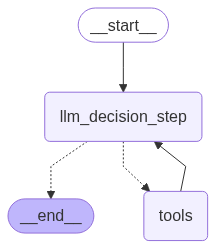

In [28]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [29]:
response = react_graph.invoke({'messages': [HumanMessage(content="Multiply the age of TATA group by 2?")]})

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [30]:
response['messages'][-1].content

'The Tata Group was founded in 1868, making it 155 years old as of 2023. Multiplying the age of the Tata Group by 2 gives us 310.'

In [31]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply the age of TATA group by 2?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_7ZK12fnUMdUGp2hCq0O5VwDD)
 Call ID: call_7ZK12fnUMdUGp2hCq0O5VwDD
  Args:
    query: TATA group age
================================= Tool Message =================================
Name: duckduckgo_search

In one of his first steps, Ratan Tata sought to rein in the power of some heads of Tata Group's companies, enforcing retirement ages, promoting younger people to senior positions and ramping up ... Know about Ratan Tata's net worth, family, age, quotes, and facts here. ... Tata Group companies and Tata charities donated $50 million in 2010 to Harvard Business School (HBS) for the ... Ratan Tata, who has died aged 86, was one of India's most internationally recognised business leaders. The tycoon led the Tata Group - known as a "salt-to-software" cong

In [32]:
import yfinance as yf

In [43]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     

In [44]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $199.20.'

In [45]:
tools = [add, multiply, subtract, divide, search, get_stock_price]

In [46]:
llm_with_tools.bind_tools(tools)

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x111b28070>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x11b153670>, root_client=<openai.OpenAI object at 0x111b29180>, root_async_client=<openai.AsyncOpenAI object at 0x11b1535b0>, model_name='gpt-4o', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\n\nArgs:\n    a (float): The first integer.\n    b (float): The second integer.\n\nReturns:\n    float: The sum of a and b.', 'parameters': {'properties': {'a': {'type': 'number'}, 'b': {'type': 'number'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply two integers.\n\nArgs:\n    a (float): The first integer.\n    b (float): The second integer.\n\nReturns:\n    float: The product of a 

In [47]:
SYSTEM_PROMPT = """
You are a helpful assistant tasked with answering the user's question using the following tools:

1. Arithmetic operations: add, subtract, multiply, divide.
2. Web search: DuckDuckGo (search).
3. Stock price lookup: get_stock_price (via yfinance).

Guidelines for tool usage:

- 🔹 If the user asks about a **stock's price**, always use `get_stock_price`. Never use `search` for stock prices.
- 🔹 Use `search` only for general questions, latest news, or non-financial facts.
- 🔹 Use arithmetic tools for math operations. You may combine values from other tools.
- ❗ Avoid using multiple tools redundantly — choose the one that best suits the question.
- Always explain your reasoning before giving the final answer.
"""

In [48]:
def function_1(state:MessagesState):
    user_question = state['messages']
    
    input_query = [SYSTEM_PROMPT] + user_question

    response = llm_with_tools.invoke(input_query)
    
    return {
        'messages': [response]
    }

In [49]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

builder=StateGraph(MessagesState)
builder.add_node("llm_decision_step",function_1)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"llm_decision_step")
builder.add_conditional_edges("llm_decision_step", tools_condition)
builder.add_edge("tools","llm_decision_step")
react_graph_2=builder.compile()

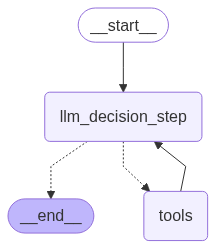

In [50]:
from IPython.display import Image, display
display(Image(react_graph_2.get_graph().draw_mermaid_png()))

In [51]:
response = react_graph_2.invoke({"messages":[HumanMessage(content="What is the current stock price of Apple with the latest news of Apple and add 1000 to it?")]})

In [52]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the current stock price of Apple with the latest news of Apple and add 1000 to it?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_riwh3tcyb0el0y0gPfn0hfWI)
 Call ID: call_riwh3tcyb0el0y0gPfn0hfWI
  Args:
    query: latest news about Apple Inc.
  duckduckgo_search (call_gSGwK5OpI9irYPrdAdMDSric)
 Call ID: call_gSGwK5OpI9irYPrdAdMDSric
  Args:
    query: current stock price of Apple Inc.
================================= Tool Message =================================
Name: duckduckgo_search

At today's WWDC 2025 keynote event, Apple unveiled a new design that will inform the next decade of iOS, iPadOS, and macOS development, so... From the new Liquid Glass interface to the Mac-like features coming to the iPad, here's all the news from Monday's WWDC keynote. Here's everything the tech company announced in its WWDC 2025 keynote ad